In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
excel_file = "TCDM.xlsx"
TCDM = pd.read_excel(excel_file)
print(TCDM.head())

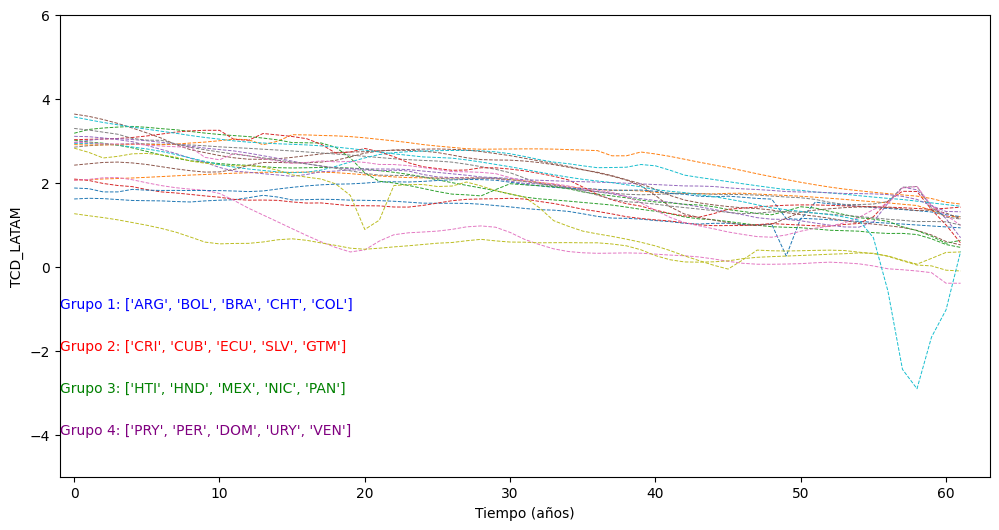

In [29]:
LATAM = TCDM
plt.figure(figsize=(12, 6))
for i in TCDM.columns[1::]:  
    plt.plot(LATAM[ i], label=f"País {i}", linewidth=0.7,linestyle="--")
plt.xlim(-1, 63)
plt.ylim(-5, 6)
plt.xlabel("Tiempo (años)")
plt.ylabel("TCD_LATAM")
Paislatam1 = ["ARG", "BOL", "BRA", "CHT", "COL"]
Paislatam2 = ["CRI", "CUB", "ECU", "SLV", "GTM"]
Paislatam3 = ["HTI", "HND", "MEX", "NIC", "PAN"]
Paislatam4 = ["PRY", "PER", "DOM", "URY", "VEN"]
plt.text(-1, -1.0, f"Grupo 1: {Paislatam1}", fontsize=10, color="blue")
plt.text(-1, -2.0, f"Grupo 2: {Paislatam2}", fontsize=10, color="red")
plt.text(-1, -3.0, f"Grupo 3: {Paislatam3}", fontsize=10, color="green")
plt.text(-1, -4.0, f"Grupo 4: {Paislatam4}", fontsize=10, color="purple")
plt.show()


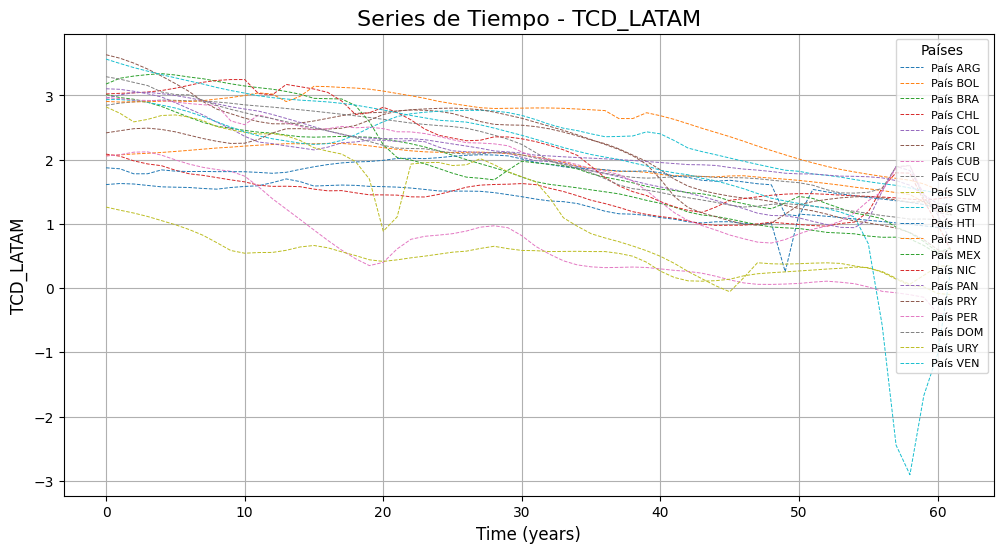

In [ ]:
LATAM =TCDM
LATAM_MA = LATAM[TCDM.columns[1::]]  
start = 1
frequency = 62  # Asumiendo frecuencia por año
time = np.linspace(start, start + LATAM_MA.shape[0] - 1, LATAM_MA.shape[0])
plt.figure(figsize=(12, 6))
for i in TCDM.columns[1::]:  
    plt.plot(LATAM_MA[i], label=f"País {i}", linewidth=0.7,linestyle="--")
plt.title("Series de Tiempo - TCD_LATAM", fontsize=16)
plt.xlabel("Time (years)", fontsize=12)
plt.ylabel("TCD_LATAM", fontsize=12)
plt.legend(fontsize=8, loc="upper right", title="Países")
plt.grid(True)
plt.show()

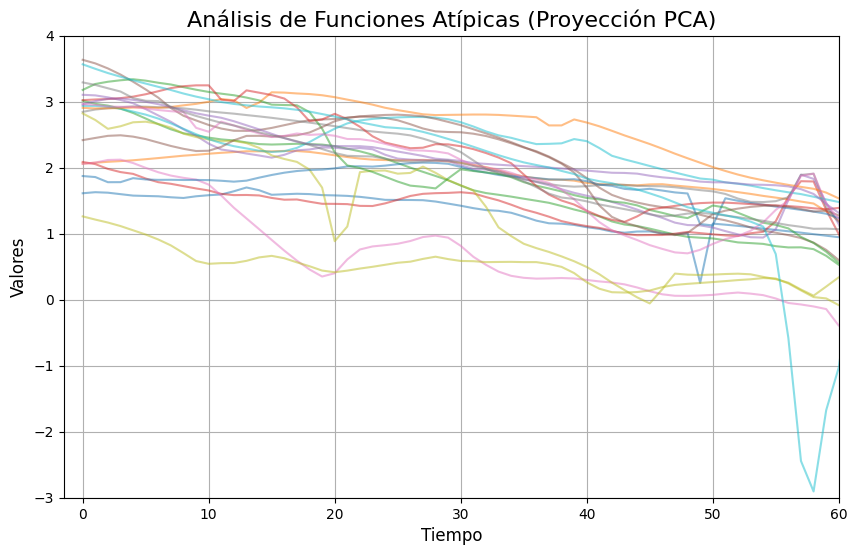

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
np.random.seed(42)
n_samples = 62  # Tiempo
n_features = 21  # Países
data =LATAM_MA  # Datos simulados
pca = PCA(n_components=2)  # Proyección a 2 dimensiones para visualización
data_pca = pca.fit_transform(data)
plt.figure(figsize=(10, 6))
for i in TCDM.columns[1::]:  # Graficar cada país como una línea
    plt.plot(data[i], label=f"País {i}", alpha=0.5)
plt.title("Análisis de Funciones Atípicas (Proyección PCA)", fontsize=16)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.grid(True)
plt.ylim(-3, 4)
plt.xlim(-1.5, 60)
plt.show()

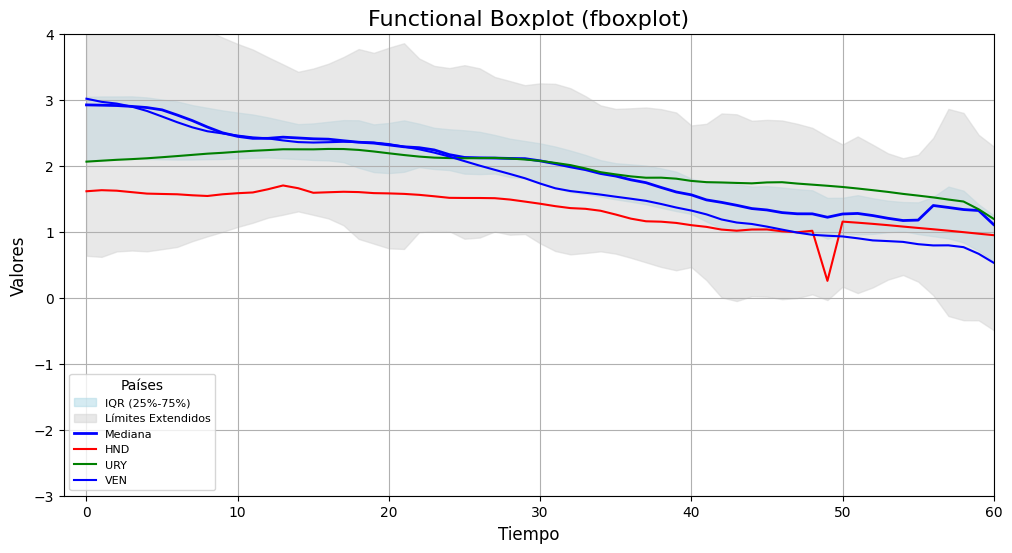

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
np.random.seed(42)
n_samples = 62  # Tiempo
n_features = 21  # Países
data = np.asarray(LATAM_MA)  # Datos simulados
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.T)  # Transponer para proyección funcional
median = np.median(data, axis=1)  # Mediana en cada tiempo
q1 = np.percentile(data, 25, axis=1)  # Percentil 25 (Q1)
q3 = np.percentile(data, 75, axis=1)  # Percentil 75 (Q3)
iqr = q3 - q1  # Rango intercuartil
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
plt.figure(figsize=(12, 6))
plt.fill_between(range(n_samples), q1, q3, color="lightblue", alpha=0.5, label="IQR (25%-75%)")
plt.fill_between(range(n_samples), lower_fence, upper_fence, color="lightgray", alpha=0.5, label="Límites Extendidos")
plt.plot(range(n_samples), median, color="blue", linewidth=2, label="Mediana")
plt.plot(range(n_samples), data[:, 0], color="red", label="HND")
plt.plot(range(n_samples), data[:, 1], color="green", label="URY")
plt.plot(range(n_samples), data[:, 2], color="blue", label="VEN")
plt.title("Functional Boxplot (fboxplot)", fontsize=16)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.xlim(-1.5, 60)
plt.ylim(-3, 4)
plt.legend(loc="lower left", fontsize=8, title="Países")
plt.grid(True)
plt.show()

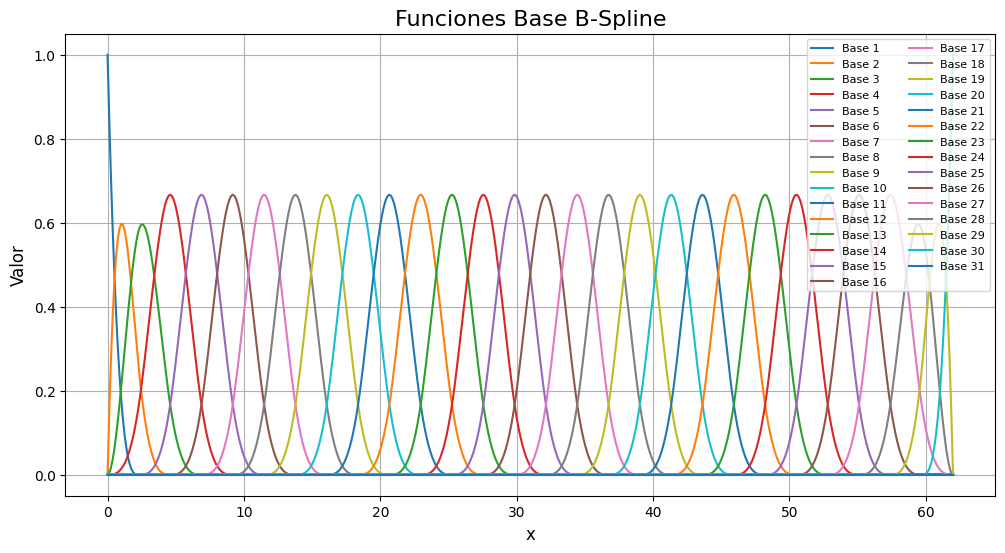

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Crear el rango de valores
rangeval = (0, 62)
x = np.linspace(rangeval[0], rangeval[1], 500)  # Puntos en el rango

# Número de bases B-spline
nbasis = 30

# Crear los nodos (knots) de la spline
knots = np.linspace(rangeval[0], rangeval[1], nbasis - 2)  # n_knots = nbasis - grado - 1
knots = np.concatenate(([rangeval[0]] * 3, knots, [rangeval[1]] * 3))  # Extender los bordes

# Crear funciones base B-spline
splines = []
for i in range(len(knots) - 3):
    coeffs = np.zeros(len(knots) - 3)
    coeffs[i] = 1  # Coeficiente de la base spline activa
    spline = BSpline(knots, coeffs, k=3)  # k=3 para cubic B-spline
    splines.append(spline)

# Graficar las funciones base spline
plt.figure(figsize=(12, 6))
for i, spline in enumerate(splines):
    plt.plot(x, spline(x), label=f"Base {i+1}")

# Configuración del gráfico
plt.title("Funciones Base B-Spline", fontsize=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.grid(True)
plt.legend(fontsize=8, loc="upper right", ncol=2)

# Mostrar el gráfico
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_lsq_spline

# Simulación de datos (reemplaza con tus datos reales)
np.random.seed(42)
LATAM_MA = np.asarray(LATAM_MA)  # 62 tiempos y 20 países

# Crear los nodos (knots) de la spline
rangeval = (0, 62)
nbasis = 30
knots = np.linspace(rangeval[0], rangeval[1], nbasis - 2)  # Nudos internos
knots = np.concatenate(([rangeval[0]] * 3, knots, [rangeval[1]] * 3))  # Extender para grado cúbico

# Ajustar las funciones spline para cada país
splines = []
x = np.linspace(rangeval[0], rangeval[1], LATAM_MA.shape[0])  # Valores de tiempo
for i in range(LATAM_MA.shape[1]):
    y = LATAM_MA[:, i]
    coef = np.zeros(len(knots) - 3)  # Inicializar coeficientes
    spl = make_lsq_spline(x, y, t=knots[3:-3])  # Ajustar spline
    splines.append(spl)

# Graficar las funciones ajustadas
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20(np.linspace(0, 1, LATAM_MA.shape[1]))  # Colores para las líneas

for i, spl in enumerate(splines):
    plt.plot(x, spl(x), label=f"País {i+1}", color=colors[i])

# Configuración del gráfico
plt.title("Funciones Ajustadas con Base Spline", fontsize=16)
plt.xlabel("Tiempo (Años)", fontsize=12)
plt.ylabel("DF_LATAM", fontsize=12)
plt.grid(True)

# Leyendas específicas
Paislatam1 = ["ARG", "BOL", "BRA", "CHT", "COL"]
Paislatam2 = ["CRI", "CUB", "ECU", "SLV", "GTM"]
Paislatam3 = ["HTI", "HND", "MEX", "NIC", "PAN"]
Paislatam4 = ["PRY", "PER", "DOM", "URY", "VEN"]

plt.legend(Paislatam1, loc="upper right", fontsize=8, title="Grupo 1")
plt.legend(Paislatam2, loc="lower left", fontsize=8, title="Grupo 2")

plt.show()

ValueError: Out of bounds w/ x = [ 0.          1.01639344  2.03278689  3.04918033  4.06557377  5.08196721
  6.09836066  7.1147541   8.13114754  9.14754098 10.16393443 11.18032787
 12.19672131 13.21311475 14.2295082  15.24590164 16.26229508 17.27868852
 18.29508197 19.31147541 20.32786885 21.3442623  22.36065574 23.37704918
 24.39344262 25.40983607 26.42622951 27.44262295 28.45901639 29.47540984
 30.49180328 31.50819672 32.52459016 33.54098361 34.55737705 35.57377049
 36.59016393 37.60655738 38.62295082 39.63934426 40.6557377  41.67213115
 42.68852459 43.70491803 44.72131148 45.73770492 46.75409836 47.7704918
 48.78688525 49.80327869 50.81967213 51.83606557 52.85245902 53.86885246
 54.8852459  55.90163934 56.91803279 57.93442623 58.95081967 59.96721311
 60.98360656 62.        ].